## Data Preprocessing

In [6]:
#Importing the Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
#Reading the dataframe
#As the tsv file is \t separated therefore we are using '\t' as a separator
df = pd.read_csv('spam.tsv',sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [9]:
#Displaying first five row of the dataframe
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
#checking for empty field in dataset
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
#checking the dataframe from below , First five column
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [12]:
#To do the statistical  analysis of numerical dataframe dataframe 
# i.e column having numeric data only
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [13]:
#To count the occurence of each datatype in label column
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
#Takking the 'ham' value only
ham = df[df['label'] == 'ham']

In [15]:
#Taking the spam value only
spam = df[df['label'] == 'spam']

In [16]:
#To get the tuple of number of rows and nummber of columns in a dataset
ham.shape , spam.shape

((4825, 4), (747, 4))

In [17]:
#Making the 'ham' dataset equivalent to spam dataset
ham = ham.sample(spam.shape[0])

In [18]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [19]:
#As both of the dataset have the same index , we are ignoring the index of spam
data = ham.append(spam,ignore_index=True)

In [20]:
#Now checking the shape of newly formed dataframe
data.shape

(1494, 4)

In [21]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

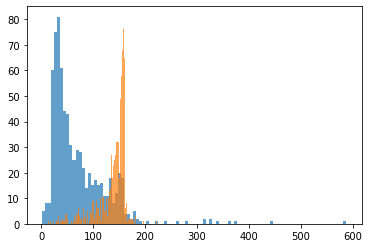

In [22]:
#Making the Analysis with 'Ham vs Length' and 'spam vs length' histogram with matplotlib
plt.hist(data[data['label'] == 'ham']['length'] , bins = 100 , alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'] , bins = 100 , alpha = 0.7)
plt.show()

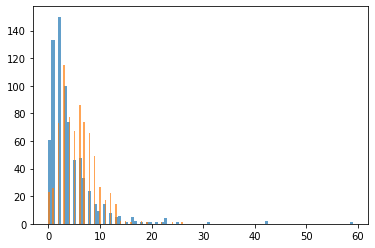

In [23]:
#Making the Analysis with 'Ham vs punct' and 'spam vs punct' histogram with matplotlib
plt.hist(data[data['label'] == 'ham']['punct'] , bins = 100 , alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'] , bins = 100 , alpha = 0.7)
plt.show()

## Splitting the dataset into train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size = 0.3,random_state = 0,shuffle = True)

In [25]:
X_train.shape,X_test.shape

((1045,), (449,))

## Building the model using Random Forest

In [ ]:
# >>> from sklearn.feature_extraction.text import TfidfVectorizer
# >>> corpus = [
# ...     'This is the first document.',
# ...     'This document is the second document.',
# ...     'And this is the third one.',
# ...     'Is this the first document?',
# ... ]
# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
# >>> print(X.shape)
# (4, 9)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline


In [38]:
classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators = 100,criterion='entropy'))])

In [39]:
classifier.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=N

## Predicting the Results (Random Forest)

In [40]:
Y_pred = classifier.predict(X_test)

In [41]:
y_test,Y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

In [42]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [43]:
accuracy_score(y_test,Y_pred)

0.9443207126948775

In [44]:
confusion_matrix(y_test,Y_pred)

array([[224,   3],
       [ 22, 200]])

In [45]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



## Building the model using SVM

In [46]:
from sklearn.svm import SVC
svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])

In [47]:
svm.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

## Predicting the Results(SVM)

In [48]:
y_pred = svm.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [50]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 19, 203]])

In [51]:
test_1 = ['Hello , We are learning machine learning model']
test_2 = ['Hope you are doing well and learning new technologies']
test_3 = ['congratulations ! , You won a lottery of $1 million ! To claim call on 355672']

In [52]:
#Predicting our data with Random Forest Classifier
print(classifier.predict(test_1))
print(classifier.predict(test_2))
print(classifier.predict(test_3))

['ham']
['ham']
['spam']


In [53]:
#Predicting our data with Support Vector Machine (SVM)
print(svm.predict(test_1))
print(svm.predict(test_2))
print(svm.predict(test_3))

['ham']
['ham']
['spam']
